<a href="https://colab.research.google.com/github/al-imran-sonet/CSE495A-Introduction-to-Robotics-/blob/main/Assignment_01/Assignment_session02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation

In [2]:
# Initialization

T=10
del_T= 0.1
t= np.arange(0,T+del_T,del_T)
print(t)
length=len(t)
print(length)
r=0.1
L=0.9

# Declaring the state vector
x=np.zeros(length)
y=np.zeros(length)
Q=np.zeros(length)  # theta

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
101


In [3]:
# Initial condition

x[0]=1
y[0]=1
Q[0]=1

In [7]:
# Declaring the Control vector


wl=np.zeros(length)
wr=np.zeros(length)

for i ,ti in enumerate(t):
  if 2 <= ti<=3:
    wl[i]=20
  elif 6 <= ti<=7.5:
    wl[i]=20
  else:
    wl[i]=5



for i ,ti in enumerate(t):
  if 4 <= ti <= 5:
    wr[i]=20
  elif 8.5 <= ti <= 9:
    wr[i]=20
  else:
    wr[i]=5




print(wr)
print(wl)




[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 20. 20. 20. 20. 20.
 20.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


In [8]:
# eulers equation

for i in range(length-1):
  x[i+1]=x[i] + (del_T * (r/2)* (wr[i] + wl[i])* np.cos(Q[i]))
  y[i+1]=y[i] + (del_T * (r/2)* (wr[i] + wl[i])* np.sin(Q[i]))
  Q[i+1]=Q[i] + (del_T * (r/L)*(wr[i] - wl[i]))

print(x,"\n",y,"\n",Q)

[1.         1.02701512 1.05403023 1.08104535 1.10806046 1.13507558
 1.16209069 1.18910581 1.21612092 1.24313604 1.27015115 1.29716627
 1.32418138 1.3511965  1.37821161 1.40522673 1.43224184 1.45925696
 1.48627208 1.51328719 1.54030231 1.60784009 1.69189162 1.79012753
 1.89982535 2.01794497 2.14121287 2.26621287 2.38948078 2.5076004
 2.61729822 2.71553412 2.74915474 2.78277535 2.81639596 2.85001657
 2.88363719 2.9172578  2.95087841 2.98449902 3.01811963 3.10217117
 3.20040707 3.31010489 3.42822451 3.55149242 3.67649242 3.79976032
 3.91787994 4.02757776 4.12581367 4.2098652  4.23688031 4.26389543
 4.29091054 4.31792566 4.34494077 4.37195589 4.398971   4.42598612
 4.45300123 4.52053902 4.60459055 4.70282646 4.81252428 4.9306439
 5.0539118  5.1789118  5.30217971 5.42029932 5.52999714 5.62823305
 5.71228458 5.77982237 5.82897471 5.8583794  5.86722155 5.86243538
 5.8576492  5.85286302 5.84807684 5.84329067 5.83850449 5.83371831
 5.82893213 5.82414596 5.81218051 5.82102266 5.85042736 5.899579

Text(0, 0.5, 'Theta value')

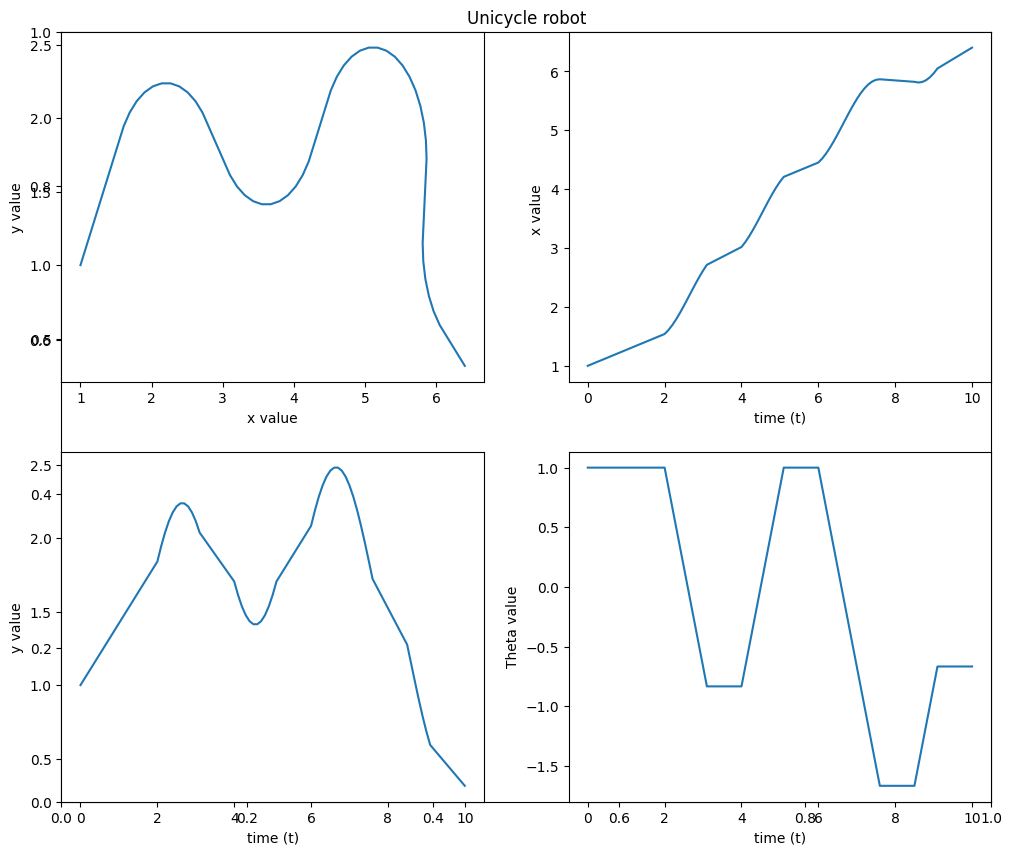

In [9]:
# Ploting the Graph

plt.figure(figsize=(12,10))
plt.title("Unicycle robot")
plt.subplot(2,2,1)

# Graph of x vs y
plt.plot(x,y)
plt.xlabel("x value")
plt.ylabel("y value")

# Graph of x vs t
plt.subplot(2,2,2)
plt.plot(t,x)
plt.xlabel("time (t)")
plt.ylabel("x value ")

# Graph of y vs t
plt.subplot(2,2,3)
plt.plot(t,y)
plt.xlabel("time (t)")
plt.ylabel("y value")

# Graph of Q vs t
plt.subplot(2,2,4)
plt.plot(t,Q)
plt.xlabel("time (t)")
plt.ylabel("Theta value")

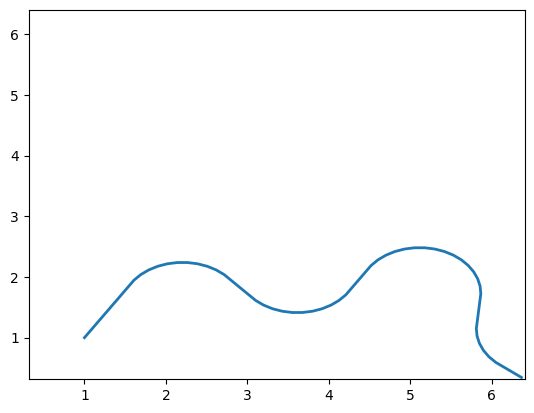

In [10]:
# Code for the annimation for x vs y

fig,ax=plt.subplots()
ax.set_xlim(min(y), max(x))
ax.set_ylim(min(y),max(x))
line, = ax.plot([], [], lw=2)

def init():
  line.set_data([], [])
  return line,

def update(frame):
  x_data = x[:frame]
  y_data = y[:frame]
  line.set_data(x_data, y_data)
  return line,

ani=animation.FuncAnimation(fig,update,frames=length,init_func=init,blit=True)


from IPython.display import HTML #for colab , its not necessary for vs code
HTML(ani.to_jshtml())